<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

### 1. Implement the K-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">
Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isn’t right!
</div>

In [1]:
import matplotlib.cm as cm
from time import time
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('kmeansdata.mat')

In [2]:
X = mat['X']
print(X.shape)

(100, 2)


In [3]:
def euclidean_distance(p1, p2):
    c = np.asarray(p1) - np.asarray(p2)
    return np.sqrt(c.T.dot(c))

In [4]:
def find_closest_centroid(datapoint, centroids):
    return min(enumerate(centroids), key=lambda x: euclidean_distance(datapoint, x[1]))[0]  

In [5]:
def randomize_centroids(data, k):
    # check max number of centroids
    if k > len(data):
        k = len(data)
    centroids = list(range(len(data)))
    np.random.shuffle(centroids)
    return [data[centroid] for centroid in centroids[:k]]

In [6]:
MAX_ITERATIONS = 100

def check_converge(centroids, old_centroids, num_iterations, threshold=0):
    if num_iterations > MAX_ITERATIONS:
        return True
    return (np.array([euclidean_distance(new, old) \
                      for new, old in zip(centroids, old_centroids)]) <= threshold).all()

In [7]:
def update_centroids(centroids, clusters):
    assert(len(centroids) == len(clusters)), "Different number of clusters and centroids"
    clusters = np.array(clusters)
    for i, cluster in enumerate(clusters):
        centroids[i] = sum(cluster)/len(cluster)
    return centroids

In [8]:
def kmeans(data, k=2, centroids=None):
    # randomize the centroids if they are not given
    if not centroids:
        centroids = randomize_centroids(data, k)

    old_centroids = centroids[:]

    iterations = 0
    while True:
        iterations += 1

        # init empty clusters
        clusters = [[] for i in range(k)]

        # assign each data point to the closest centroid
        for sample in data:
            # find the closest center of each data point
            centroid_idx = find_closest_centroid(sample, centroids)
            
            # assign datapoint to the closest cluster
            clusters[centroid_idx].append(sample)
        
        # keep the current position of centroids before changing them
        old_centroids = centroids[:]
        
        # update centroids
        centroids = update_centroids(centroids, clusters)
        # if the stop criteria are met, stop the algorithm
        if check_converge(centroids, old_centroids, iterations):
            break
    print("Number of updates: ", iterations)
    return centroids

Number of updates:  3
K-means time:  0.22635197639465332


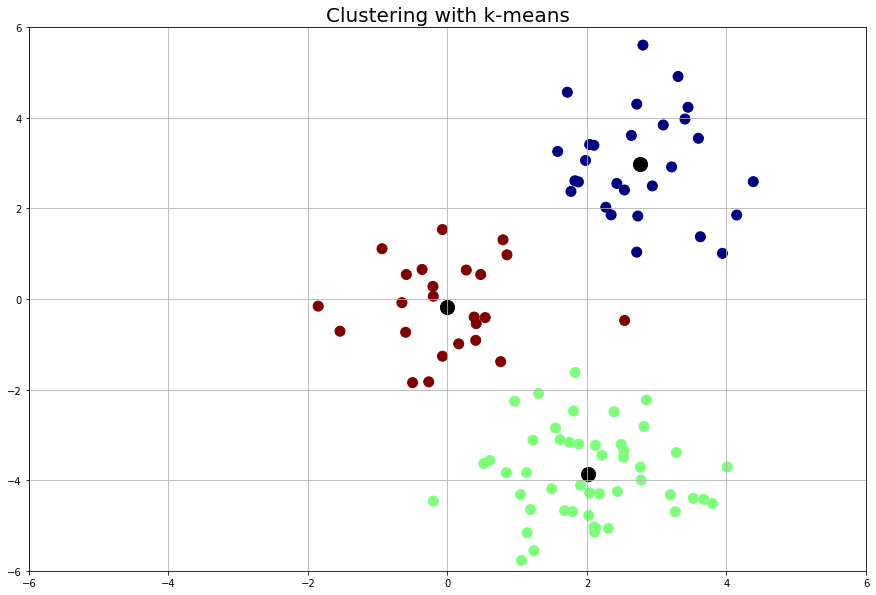

K-means time:  0.22635197639465332


In [9]:
t0 = time()
centers = np.array(kmeans(X, k=3))
labels = [find_closest_centroid(p, centers) for p in X]
t1 = time()
print("K-means time: ", t1-t0)
#plot the clusters in color
fig = plt.figure(1, figsize=(15, 10))
colormap = cm.get_cmap('jet')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=colormap, s=100)
plt.scatter(centers[:,0], centers[:,1], c='k', s=200)
plt.title("Clustering with k-means", fontsize=20)
plt.axis([-6, 6, -6, 6])
plt.grid()
plt.show()
print("K-means time: ", t1-t0)

### 2. Run your algorithm for K = 2, 3, 4, 5 and, in each case, plot the data using a different symbol for each cluster. Show the results


Number of updates:  5


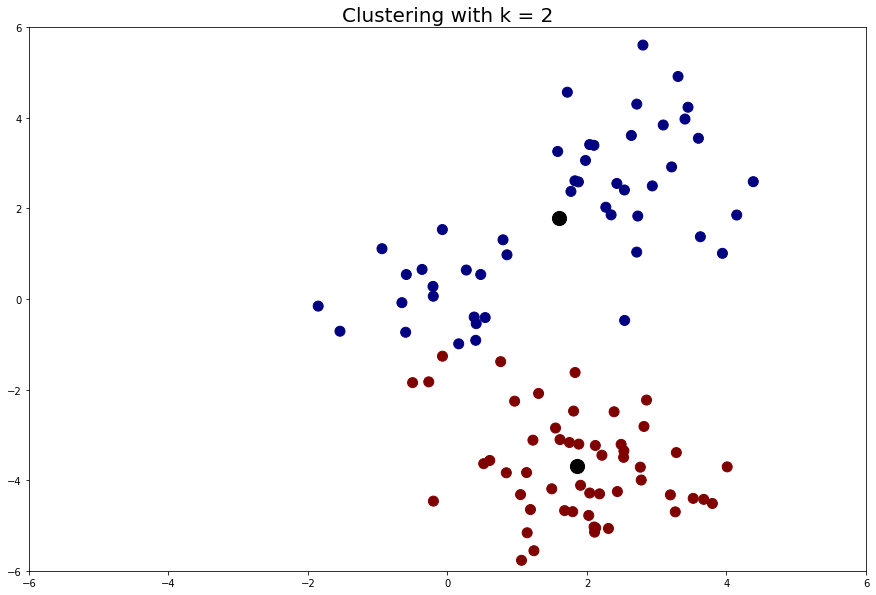

K-means time:  0.011380195617675781
Number of updates:  6


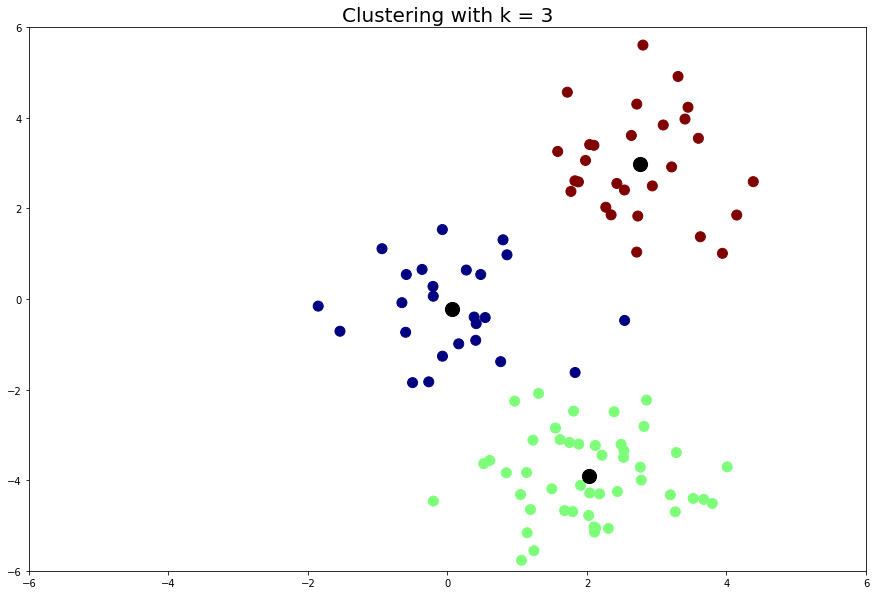

K-means time:  0.02030014991760254
Number of updates:  6


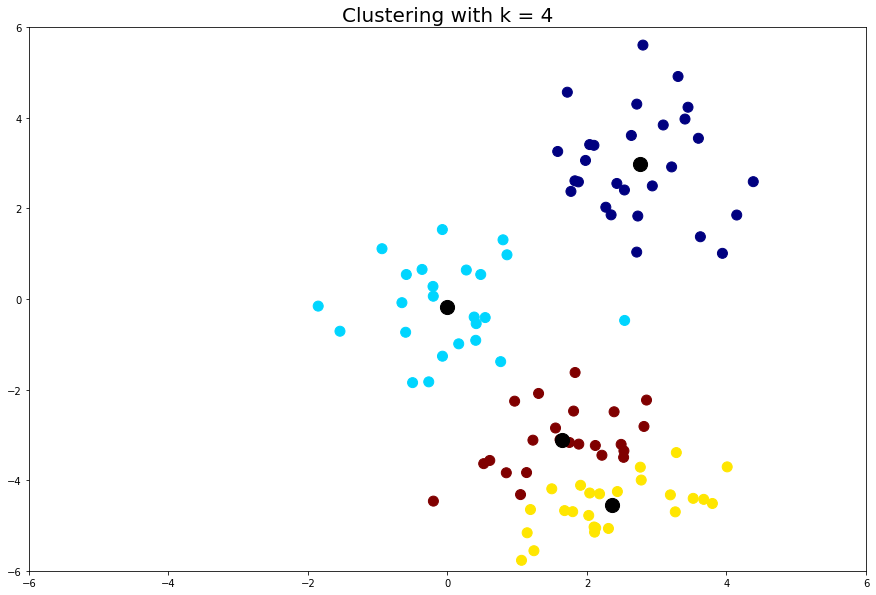

K-means time:  0.021273136138916016
Number of updates:  7


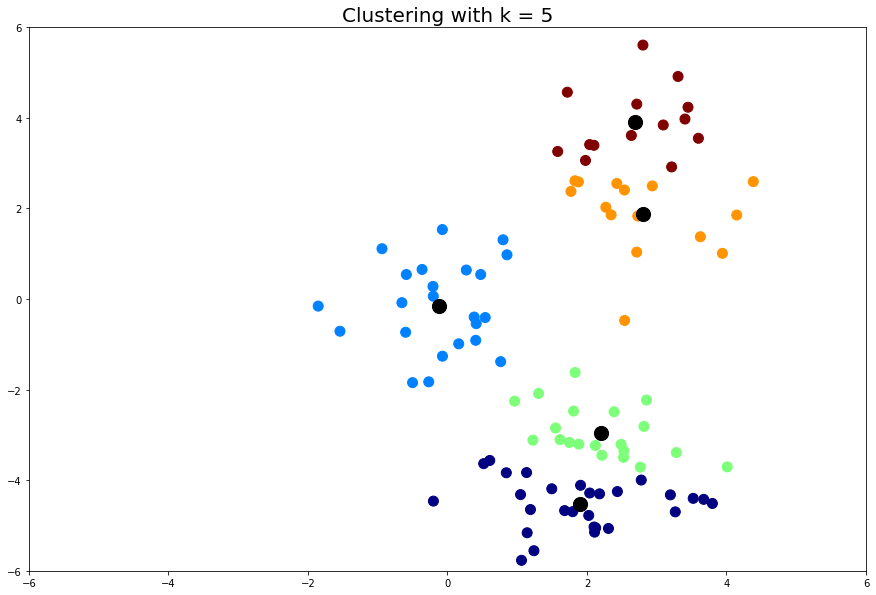

K-means time:  0.03616452217102051


In [10]:
for k_ in range(2,6):
    t0 = time()
    centers = np.array(kmeans(X, k=k_))
    labels = [find_closest_centroid(p, centers) for p in X]
    t1 = time()
#     print("K-means time: ", t1-t0)
    #plot the clusters in color
    fig = plt.figure(1, figsize=(15, 10))
    colormap = cm.get_cmap('jet')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=colormap, s=100)
    plt.scatter(centers[:,0], centers[:,1], c='k', s=200)
    plt.title("Clustering with k = %d" %k_, fontsize=20)
    plt.axis([-6, 6, -6, 6])
    plt.show()
    print("K-means time: ", t1-t0)